In [1]:
from top2vec import Top2Vec
from gensim.models.coherencemodel import CoherenceModel
import os
import pandas as pd
from nltk.tokenize import word_tokenize

import gensim.corpora as corpora
from utils.config import random_sample,seed

In [2]:
import os
import pandas as pd

In [3]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

model_type = "top2vec"
model_name = "Top2Vec"
experiment="embedding"
embedding_model = "all-roberta-large-v1"
data_type="np_mini_stopwords"
file_name=f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"
file_name_data = f"{data_type}.csv"

folder_path_topics = f"preprocessed_data/results/embedding/{model_type}"
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"

folder_name = f"Embedding-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)


df = load_from_file(folder_path_data,file_name_data)



data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [4]:
df

,text,label,date
0,representanten harald tom nesvik bad ordet nat...,1,2009-06-03
1,selvfølgelig diskusjon timer saken konstatere ...,1,2011-02-16
2,takk svaret svar linjene senterpartiets progra...,0,2007-03-21
3,riktig alternative statsbudsjetter prinsipale ...,0,2004-10-26
4,dagens dagsavisen stortingsrepresentant astrid...,0,2000-11-15
...,...,...,...
3595,slutte representanten tone merete sønsterud fo...,1,2010-06-14
3596,oppfølgingsspørsmål landbruksministeren utanri...,1,2004-03-10
3597,tillater stille statsråden følgende spørsmål s...,0,2009-10-21
3598,fnorganisasjonene indikasjon norge regne øknin...,1,2006-10-05


In [5]:
topic_model = None
try:
    topic_model = Top2Vec.load(file_path)
except:
    print("success")
    topic_model = Top2Vec(documents = new_data, embedding_model="all-roberta-large-v1")

In [6]:
topic_model.save(file_path)

In [7]:
print(topic_model.embedding_model)

all-roberta-large-v1


In [8]:
num_topics = topic_model.get_num_topics()
print(num_topics)

20


In [9]:
topic_sizes, topic_nums = topic_model.get_topic_sizes()

In [10]:
topic_words, word_scores, topic_nums = topic_model.get_topics(num_topics)

In [11]:
topic_word_scores = [dict(zip(topic_words[i][:], word_scores[i])) for i in topic_nums]

In [12]:
topic_model.get_topics()

(array([['arbeiderpartiet', 'arbeidarpartiet', 'politiske', 'politisk',
         'regjeringens', 'politikere', 'regjeringen', 'løsningen',
         'fylkeskommunene', 'politiet', 'økonomiske', 'politikken',
         'løsninger', 'fylkeskommunen', 'halvparten', 'løsning',
         'politikk', 'avgjørende', 'økonomien', 'lønning', 'ønske',
         'utviklingen', 'aktører', 'ønsket', 'løpet', 'økende', 'hørte',
         'løfte', 'alvorlige', 'ønsker', 'statlige', 'unødvendig',
         'medfører', 'økning', 'gjennomføre', 'spørsmalene', 'lønn',
         'tilnærming', 'oppfølging', 'fører', 'økte', 'høre', 'søke',
         'ønskjer', 'næringsliv', 'spørsmalet', 'tilsvarende', 'øker',
         'støtter', 'konsekvensene'],
        ['statsministeren', 'statsbudsjettet', 'statsraden',
         'statsradens', 'regjeringens', 'statlig', 'statlige',
         'regjeringen', 'økonomiske', 'økning', 'økonomien', 'ønsket',
         'løsninger', 'økende', 'løsningen', 'utviklingen',
         'konsekv

In [13]:
for i in range(num_topics):
    print("\n", i)
    print(topic_word_scores[i])



 0
{'arbeiderpartiet': 0.6610408, 'arbeidarpartiet': 0.6496544, 'politiske': 0.64554435, 'politisk': 0.6341504, 'regjeringens': 0.6332449, 'politikere': 0.63249886, 'regjeringen': 0.6207741, 'løsningen': 0.6191783, 'fylkeskommunene': 0.6190484, 'politiet': 0.61421335, 'økonomiske': 0.6100352, 'politikken': 0.60862094, 'løsninger': 0.60174865, 'fylkeskommunen': 0.59807974, 'halvparten': 0.5980072, 'løsning': 0.59794784, 'politikk': 0.5924241, 'avgjørende': 0.5923897, 'økonomien': 0.59152454, 'lønning': 0.5893537, 'ønske': 0.5886612, 'utviklingen': 0.5886135, 'aktører': 0.58816856, 'ønsket': 0.58683133, 'løpet': 0.5863975, 'økende': 0.5862895, 'hørte': 0.5848518, 'løfte': 0.584698, 'alvorlige': 0.5845236, 'ønsker': 0.5836985, 'statlige': 0.58343565, 'unødvendig': 0.5831981, 'medfører': 0.58235276, 'økning': 0.5818407, 'gjennomføre': 0.58145887, 'spørsmalene': 0.5806894, 'lønn': 0.58046854, 'tilnærming': 0.57947844, 'oppfølging': 0.57896084, 'fører': 0.5780571, 'økte': 0.57765114, 'høre'

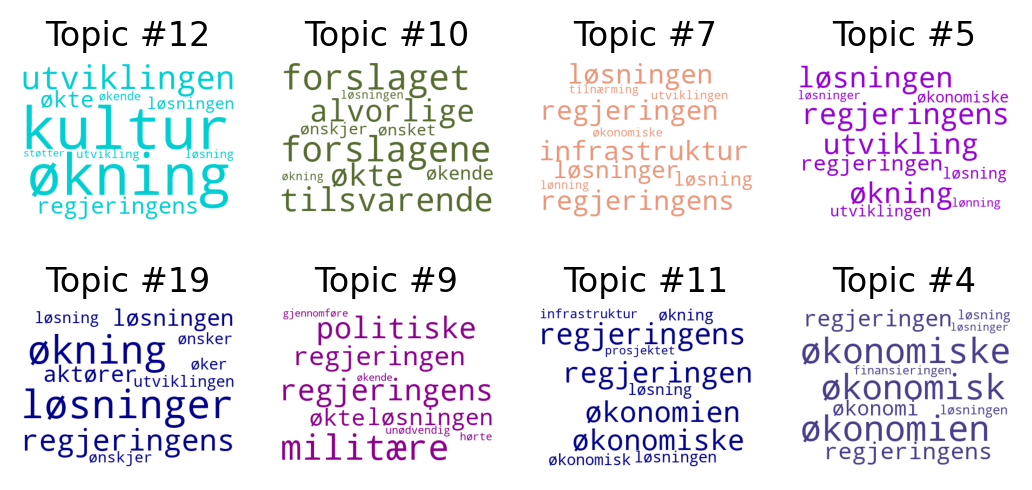

In [14]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(topic_word_scores,num_topics,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

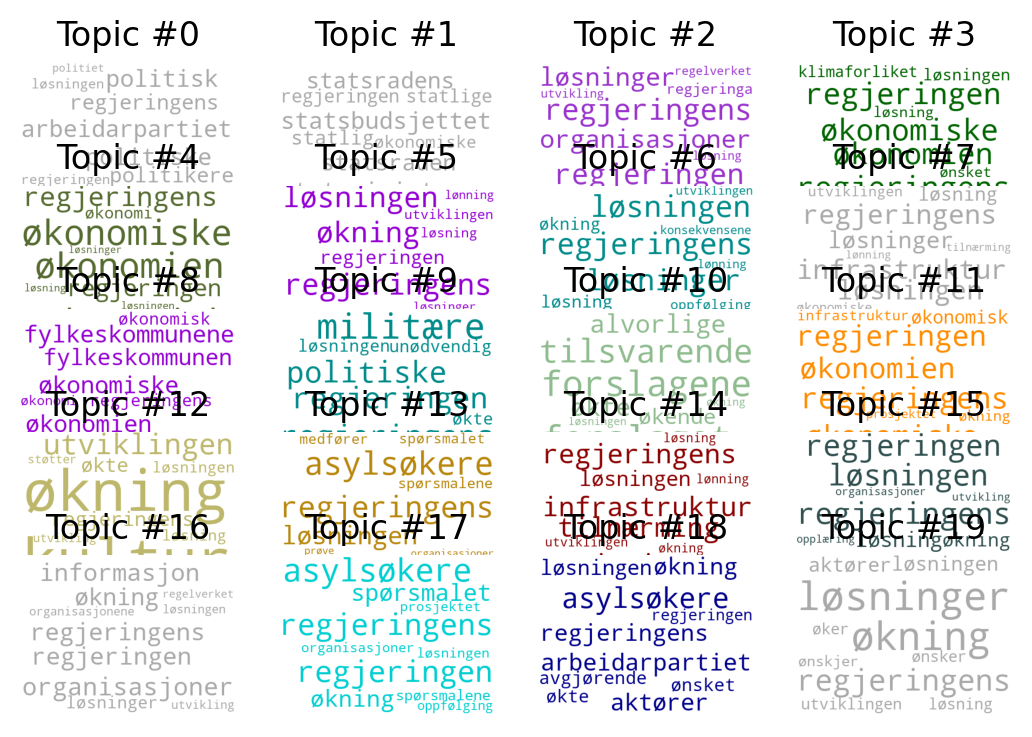

In [15]:


from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(topic_word_scores, f"{model_name}-{embedding_model}: {data_type}",num_topics, dpi=200)


In [16]:
from utils.tables_and_plots import create_wordcloud


wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(num_topics):
    topic_wordcloud = create_wordcloud(topic_word_scores[i])
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [17]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, list(topic_words[i])) for i in range(num_topics)]



write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [18]:
from utils.filemanagement import load_model_topics


loaded_topics = load_model_topics(folder_path_topics, file_name)

In [19]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [20]:
len(loaded_topics.values())

20

In [21]:

from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [22]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [23]:
from utils.stats import compute_metrics
input_data = list(loaded_topics.values())
coherence, diversity = compute_metrics(
    input_data, word_frequencies, word_co_frequencies, 10)

10
('arbeidarpartiet', 'arbeiderpartiet') wordtuple
('arbeiderpartiet', 'politiske') wordtuple
('arbeiderpartiet', 'politiske') wordup
136.0 over
206976.0 under
-10.571641122223323 -7.08746284125034 1.4915973965597988 ('arbeiderpartiet', 'politiske') 136 704 294
('arbeiderpartiet', 'politisk') wordtuple
('arbeiderpartiet', 'politisk') wordup
165.0 over
233024.0 under
-10.4637968111987 -7.366322214245815 1.4204913261820997 ('arbeiderpartiet', 'politisk') 165 704 331
('arbeiderpartiet', 'regjeringens') wordtuple
('arbeiderpartiet', 'regjeringens') wordup
158.0 over
228096.0 under
-10.49550087334482 -7.303780748177103 1.4369956102480643 ('arbeiderpartiet', 'regjeringens') 158 704 324
('arbeiderpartiet', 'politikere') wordtuple
('arbeiderpartiet', 'politikere') wordup
79.0 over
80960.0 under
-10.00114092140457 -6.303780748177103 1.5865305791761002 ('arbeiderpartiet', 'politikere') 79 704 115
('arbeiderpartiet', 'regjeringen') wordtuple
('arbeiderpartiet', 'regjeringen') wordup
951.0 over
1

In [24]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.21622703066101648


In [25]:
diversity

0.325

In [26]:
coherence

2.5416790244972196

In [27]:
from tabulate import tabulate
import csv

In [28]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒════════════════════════════════════════════════╤═══════════╤═════════╕
│ Model                                          │ Metric    │   Value │
╞════════════════════════════════════════════════╪═══════════╪═════════╡
│ top2vec_all-roberta-large-v1_np_mini_stopwords │ coherence │ 2.54168 │
├────────────────────────────────────────────────┼───────────┼─────────┤
│ top2vec_all-roberta-large-v1_np_mini_stopwords │ diversity │ 0.325   │
╘════════════════════════════════════════════════╧═══════════╧═════════╛


In [29]:
# Save all topic stats to file

topic_stats_folder_path = fr"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})